# Modéle d' apprentissage automatique de l'irrigation d'un champ de riz

In [1]:
# -*- coding: utf-8 -*-


import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

Récupération des données

In [3]:
valeurs = pd.read_csv(r"C:\Users\STIRIAS\Documents\Machine-learning\projet\dataset12.csv")
valeurs.head()

,Temperature,Humidite,water_level
0,32.8,54.0,630
1,30.5,55.0,632
2,30.5,56.0,634
3,30.6,56.0,636
4,30.6,56.0,634


In [4]:
valeurs.describe()

,Temperature,Humidite,water_level
count,89.000000,89.000000,89.000000
mean,39.202247,51.831461,400.685393
std,8.945136,5.804066,218.811074
min,30.500000,39.000000,0.000000
25%,30.500000,48.000000,243.000000
50%,36.900000,55.000000,437.000000
75%,46.000000,56.000000,624.000000
max,60.100000,57.000000,647.000000


In [5]:
valeurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  89 non-null     float64
 1   Humidite     89 non-null     float64
 2   water_level  89 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Analyse des données

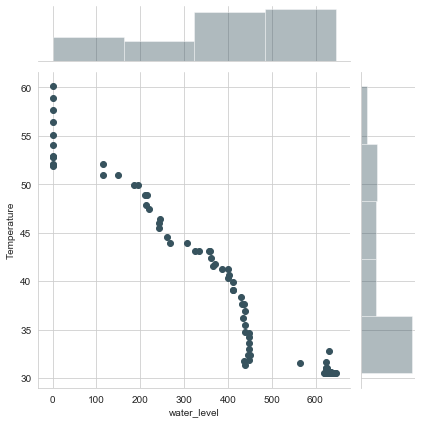

In [8]:
sns.jointplot(x='water_level',y='Temperature',data=valeurs)

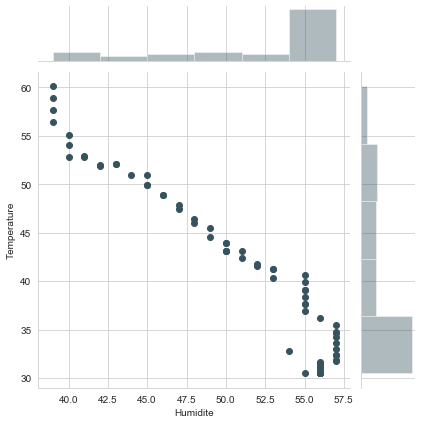

In [9]:
sns.jointplot(x='Humidite',y='Temperature',data=valeurs)

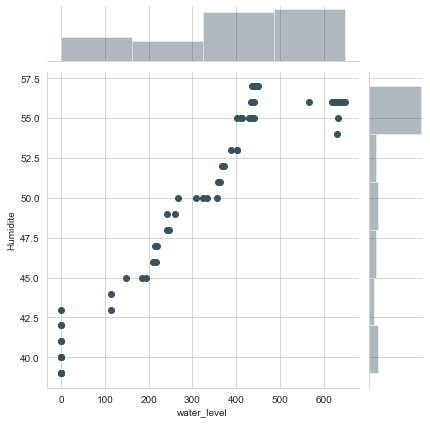

In [10]:
sns.jointplot(x='water_level',y='Humidite',data=valeurs)

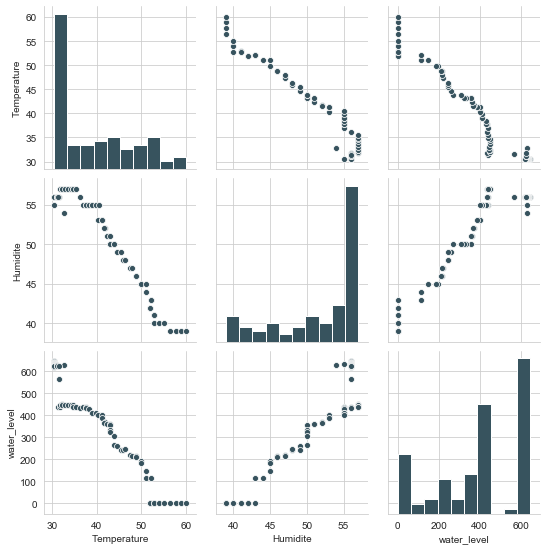

In [11]:
sns.pairplot(valeurs)

# Entrainement du modèle

In [14]:
X = valeurs[['Temperature','Humidite']]
y = valeurs['water_level']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Theta optimale 

In [20]:
lm.coef_

array([-26.33278141,  -5.09093491])

In [21]:
predictions = lm.predict(X_test)

# Evaluation du modèle

In [22]:
from sklearn import metrics

In [23]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   39.766283653233685
MSE :   2948.5498174776494
RMAE :   54.30055080270963


In [24]:
from sklearn.metrics import r2_score
print('Coefficient de détermination: %.2f'% r2_score(y_test, predictions))

Coefficient de détermination: 0.94
